In [2]:
!pip install minisom


Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12043 sha256=036d2c435614f24be7490edf17b57a37fbcea147d3d675d22be0c6b6708d7058
  Stored in directory: c:\users\2022503509\appdata\local\pip\cache\wheels\e8\17\33\9811ca090036d37bee1c8469b36fb913ab5dd12dfd78313279
Successfully built minisom


In [32]:
from minisom import MiniSom
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [54]:
iris_dataset = datasets.load_iris().data
target = datasets.load_iris().target

In [9]:
iris_dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
pca = PCA(n_components=2)
pca.fit(iris_dataset)

x = pca.transform(iris_dataset)
print(x.shape)

(150, 2)


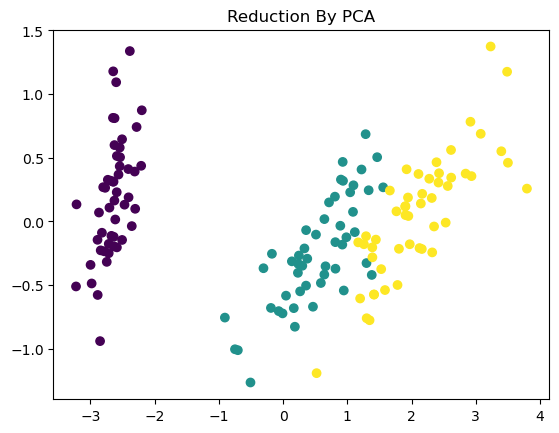

In [26]:
plt.scatter(x[:,0],x[:,1],c=target,cmap='viridis')
plt.title('Reduction By PCA')
plt.show()

In [59]:
from sklearn.preprocessing import StandardScaler

# Assuming iris_dataset is a numpy array with shape (150, 4)
scaler = StandardScaler()
iris_dataset = scaler.fit_transform(iris_dataset)

In [60]:
#SOM 
som = MiniSom(x=5, y=5, input_len=4, sigma = 2.0, learning_rate=0.5)
som.train_random(iris_dataset, num_iteration=1000)

In [61]:
bmus = np.array([som.winner(J) for J in iris_dataset])
bmus

array([[0, 4],
       [2, 4],
       [2, 4],
       [2, 4],
       [0, 4],
       [0, 3],
       [1, 4],
       [1, 4],
       [2, 4],
       [2, 4],
       [0, 3],
       [1, 4],
       [2, 4],
       [2, 4],
       [0, 3],
       [0, 3],
       [0, 3],
       [1, 3],
       [0, 3],
       [0, 3],
       [1, 3],
       [0, 3],
       [0, 4],
       [2, 3],
       [1, 4],
       [2, 4],
       [1, 3],
       [0, 4],
       [1, 3],
       [2, 4],
       [2, 4],
       [1, 3],
       [0, 3],
       [0, 3],
       [2, 4],
       [1, 4],
       [0, 4],
       [0, 4],
       [2, 4],
       [1, 4],
       [1, 3],
       [3, 4],
       [2, 4],
       [1, 3],
       [0, 3],
       [2, 4],
       [0, 3],
       [2, 4],
       [0, 3],
       [1, 4],
       [2, 1],
       [2, 2],
       [2, 1],
       [4, 4],
       [0, 1],
       [4, 3],
       [2, 2],
       [4, 4],
       [1, 1],
       [4, 3],
       [4, 4],
       [3, 2],
       [4, 4],
       [3, 2],
       [3, 3],
       [1, 1],
       [3,

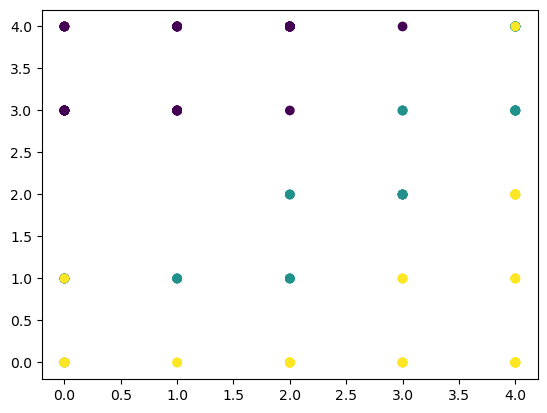

In [62]:
plt.scatter(bmus[:,0],bmus[:,1],c=target,cmap='viridis')
plt.show()